<a href="https://colab.research.google.com/github/ND-CSE-30151/spring-2024/blob/main/notes/22-utm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 22: Universal Turing Machines

In [1]:
#@title Setup
!pip install -qqq tock
from tock import *
!test -x /content/theory || git clone --quiet https://github.com/ND-CSE-30151/spring-2024 /content/theory
%cd -q /content/theory/notes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.5/536.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## Universal Turing machines

<div class="alert alert-info">
    <p><b>Read</b> page 202, just from "Before we get to the proof..." to "...stored-program computers."</p>
</div>    

Most of you are familiar with the idea of a programming language *interpreter*, which takes a program and some input to the program, and produces the same output that the program itself would have:

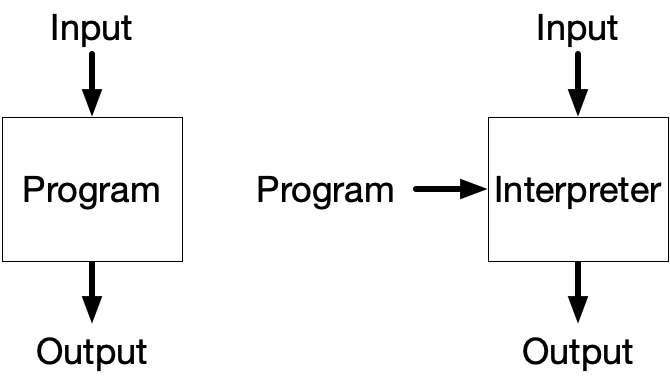

The universal TM (UTM) $U$ defined on page 202 is TM that is a TM interpreter. It can simulate any other TM. We've seen machines that simulate other machines (for example, the intersection of two DFAs $M_1$ and $M_2$ simulates both $M_1$ and $M_2$), but in those cases, the simulated machine was always hard-coded into the simulator. A universal TM is different because the code of the simulated machine is *part of the input*. That is, it takes as input both the code of a TM $M$ and an input string $w$, and simulates what $M$ would do on $w$.

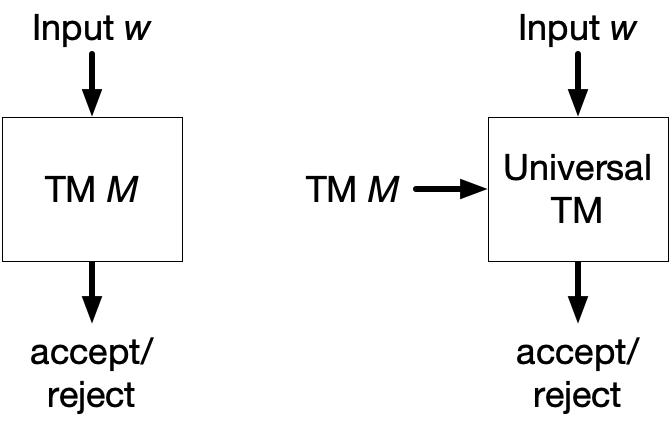

This concept is important because it is used in some of the undecidability proofs we'll see soon, and also because it's related to the concept of a *stored-program computer*.

The so-called implementation given in the book does not provide much insight into how one might actually write a UTM. We've seen one instance already: last class, we ran a C-to-TM compiler on a TM simulator written in C. The resulting (huge) Turing machine is a UTM.

But let's think about a more conventional implementation of a UTM. First, we have to show how to encode a TM as a string. Here's Turing's original encoding:

- If the states in $Q$ are numbered $q_1, q_2, \ldots$, then state $q_i$ is encoded as $\mathtt{DA}^i$. The start state is $q_1$. Turing's definition didn't have accept or reject states, but we just have to fix some convention, like $q_2$ is the accept state and $q_3$ is the reject state.
- If the symbols in $\Gamma$ are numbered $a_0, a_1, \ldots$, where $a_0$ is the blank symbol, then symbol $a_i$ is encoded as $\mathtt{DC}^i$.
- Then, the transition
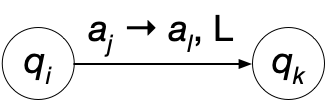
is encoded as $\mathtt{DA}^i \mathtt{DC}^j \mathtt{DC}^l \mathtt{L} \mathtt{DA}^k$, and similarly if the move is R or N (for "no move," equivalent to the book's S).
- The machine is encoded as $əT_1;T_2;\cdots;T_n⸬$ where the $T_i$ are the transitions of the machine.

Second, we have to show the universal TM itself. It is often constructed as a TM with three tapes:

1. An encoding of $M$, the machine being simulated.
2. The tape of $M$.
3. The state of $M$.

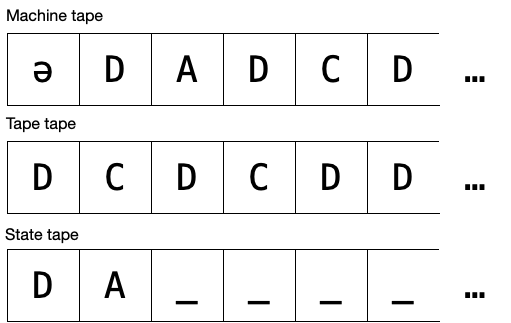

An implementation description would be: On input $\langle M, w\rangle$, where $M$ is a TM and $w$ is a string:

1. Split the input into $M$ on tape 1 and $w$ on tape 2.
2. Initialize tape 3 to the start state of $M$.
3. Repeat:
   1. If the state (tape 3) is the accept state, *accept*; if it is the reject state, *reject*.
   2. Search on tape 1 for an instruction that matches the current state (encoded on tape 3) and current input symbol (encoded on tape 2).
   3. Write the new state to tape 3 and the new symbol to tape 2.
   4. Move the head on tape 2 to the left or right as indicated by the instruction.

### The smallest UTM

There's a cottage industry of seeing who can make the smallest universal TM. The [current record holder](https://web.archive.org/web/20161226084440/http://alvyray.com/CreativeCommons/BizCardUniversalTuringMachine_v2.2.pdf), due to Rogozhin, is this (I modified it slightly for Sipser's definition of TM):

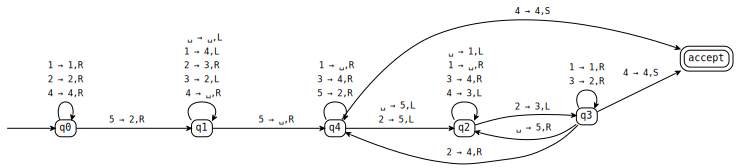

In [2]:
u = read_csv('utm.csv')
u

The reason it can be so small is that the way it "encodes" a TM is actually to convert it into a simpler (but still Turing-equivalent) formalism called a _2-tag system_. Here's an example TM, Sipser's $M_2$:

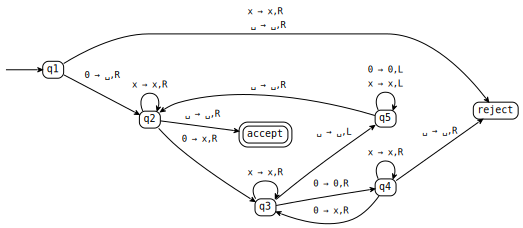

In [3]:
m2 = read_csv('tm-m2.csv')
m2

This machine converts to a 2-tag system with 450 rules. The rules look like CFG rules, but they work differently. (Match the first symbol with a rule's left-hand side, remove the first *two* symbols, and append the right-hand side.)

In [4]:
%cat tm-m2.tag

('A',_0,_1) -> ('C',_0,_1) x ('c',_0,_1) x
('α',_0,_1) -> ('c',_0,_1) x ('c',_0,_1) x
('B',_0,_1) -> ('S',_0,_1)
('β',_0,_1) -> ('s',_0,_1)
('C',_0,_1) -> ('D',_(0,_'read1'),_1) ('D',_(0,_'read1'),_0)
('c',_0,_1) -> ('d',_(0,_'read1'),_1) ('d',_(0,_'read1'),_0)
('S',_0,_1) -> ('T',_(0,_'read1'),_1) ('T',_(0,_'read1'),_0)
('s',_0,_1) -> ('t',_(0,_'read1'),_1) ('t',_(0,_'read1'),_0)
('D',_0,_1) -> ('A',_0,_1) x
('d',_0,_1) -> ('α',_0,_1) x
('T',_0,_1) -> ('B',_0,_1) x
('t',_0,_1) -> ('β',_0,_1) x
('D',_(0,_'read1'),_0) -> x ('A',_(0,_'read1'),_0) x
('d',_(0,_'read1'),_0) -> ('α',_(0,_'read1'),_0) x
('T',_(0,_'read1'),_0) -> ('B',_(0,_'read1'),_0) x
('t',_(0,_'read1'),_0) -> ('β',_(0,_'read1'),_0) x
('A',_(0,_'write0',_'move+2'),_1) -> ('C',_(0,_'write0',_'move+2'),_1) x
('α',_(0,_'write0',_'move+2'),_1) -> ('c',_(0,_'write0',_'move+2'),_1) x ('c',_(0,_'write0',_'move+2'),_1) x
('B',_(0,_'write0',_'move+2'),_1) -> ('S',_(0,_'write0',_'move+2'),_1)
('β',_(0,_'write0',_'move+2'),_1) -> ('s'

This 2-tag system, together with the input string $\texttt{0}$, are encoded into a string with 6.5 million symbols. Running the UTM is very slow. I had to write a special simulator that enables it to "fast-forward" in certain cases, and found that it accepts after **46 trillion moves**.